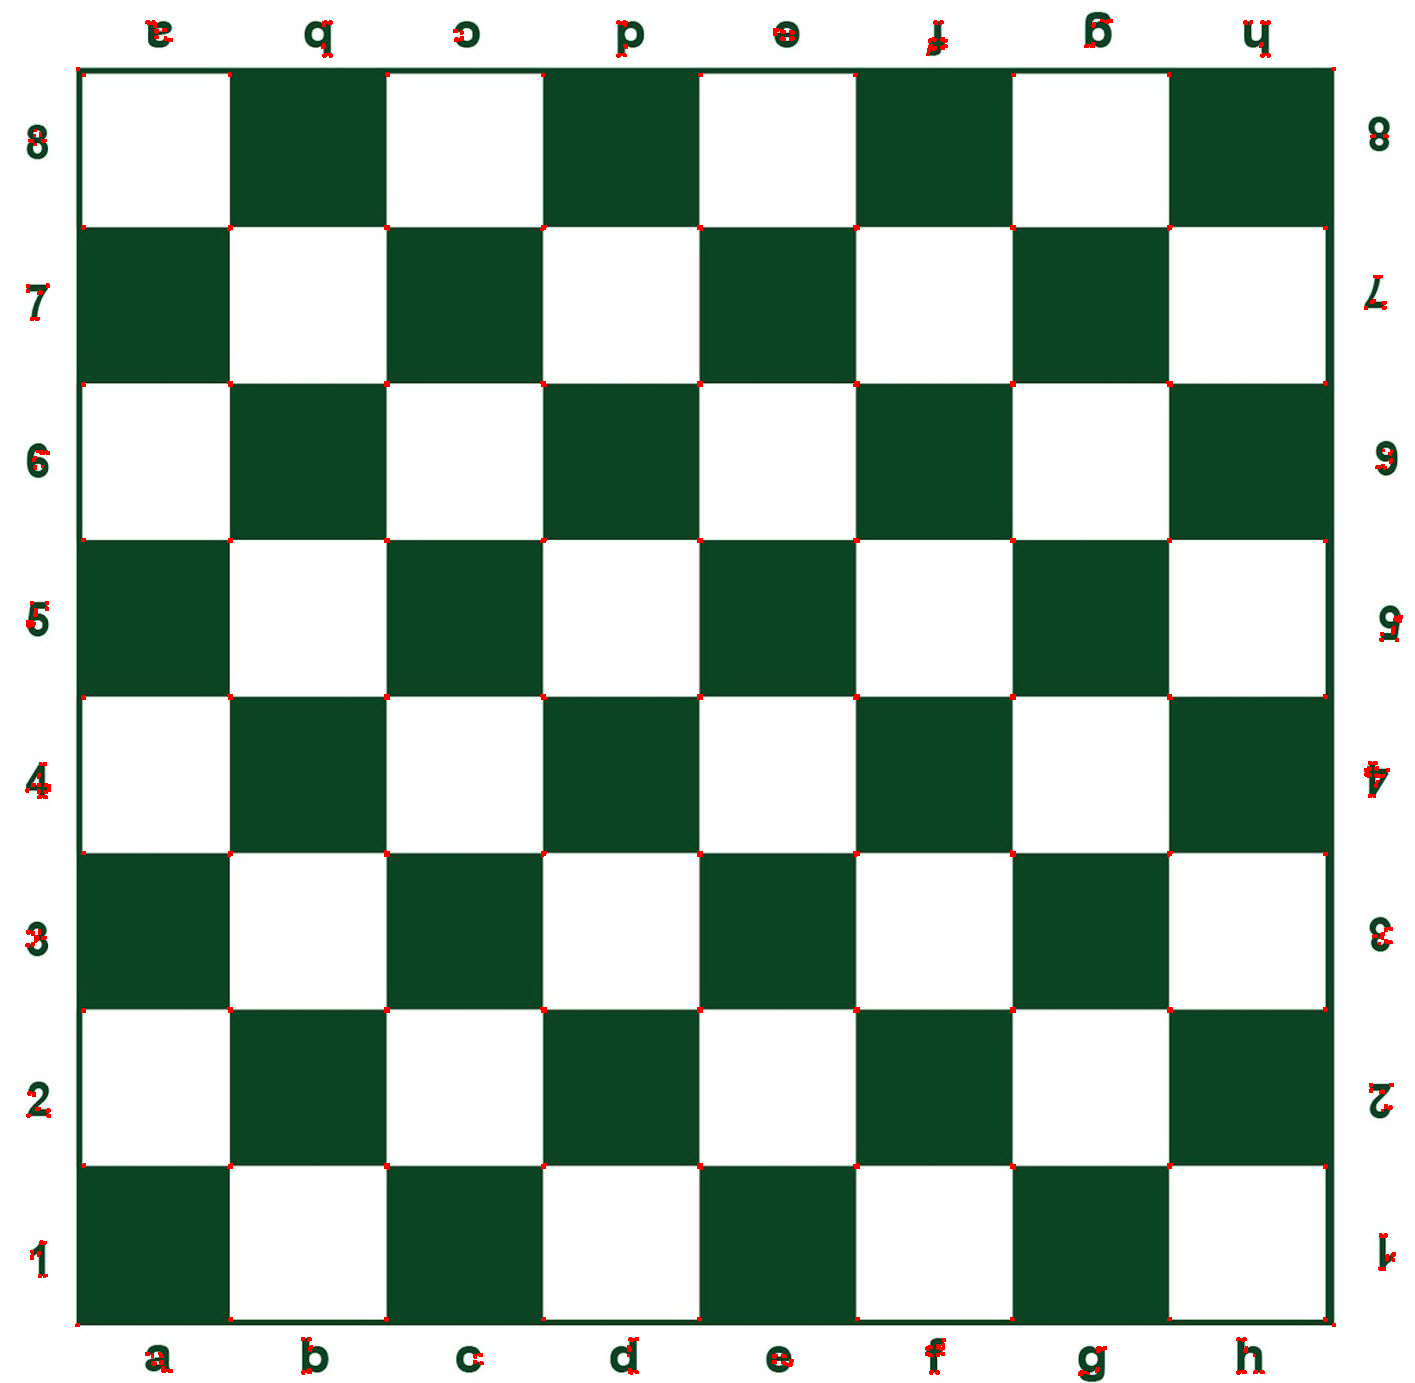

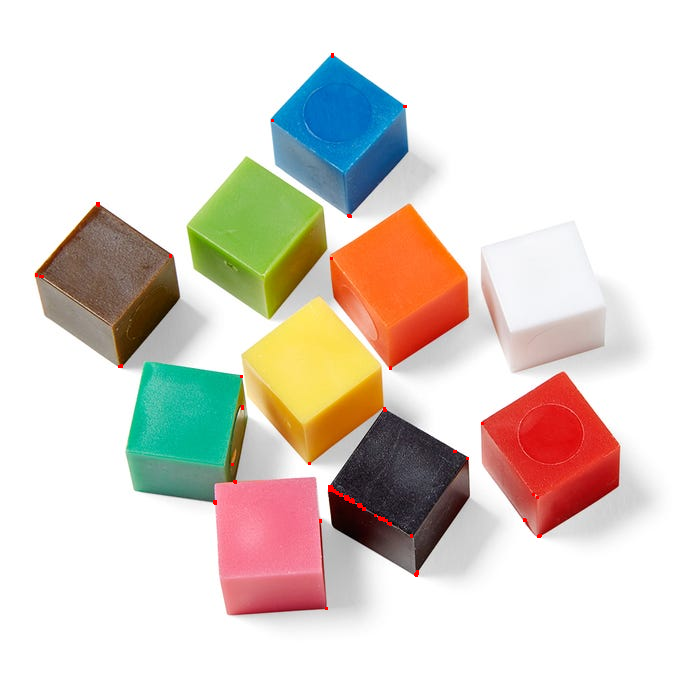

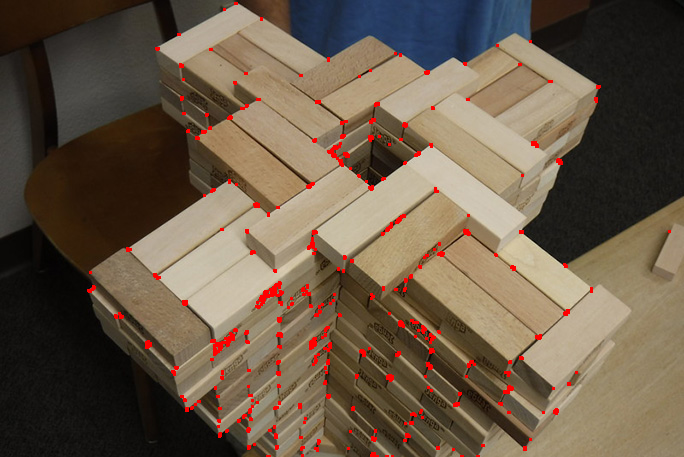

In [9]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img_lst = ['/content/chess.jpg', '/content/cubes.jpg', '/content/jenga.jpg']
data = []

for image in img_lst:
  img = cv.imread(image)
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

  gray = np.float32(gray)
  dst = cv.cornerHarris(gray, 2, 3, 0.04)

  dst = cv.dilate(dst, None)

  img[dst>0.01*dst.max()] = [0, 0, 255]

  cv2_imshow(img)
  if cv.waitKey(0) & 0xff == 27:
      cv.destroyAllWindows()

  # find Harris corners
  gray = np.float32(gray)
  dst = cv.cornerHarris(gray, 2, 3, 0.04)
  dst = cv.dilate(dst, None)
  ret, dst = cv.threshold(dst, 0.01*dst.max(), 255, 0)
  dst = np.uint8(dst)

  # find centroids
  ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

  # define the criteria to stop and refine the corners
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
  corners = cv.cornerSubPix(gray,np.float32(centroids),(5, 5),(-1, -1), criteria)

  # Now draw them
  res = np.hstack((centroids,corners))
  res = np.int0(res)
  img[res[:,1],res[:,0]]=[0,0,255]
  img[res[:,3],res[:,2]] = [0,255,0]
  data.append(img)

for i in range(len(data)):
  cv.imwrite('Result_{}.png'.format(i), data[i])